In [ ]:
#PCA to the Breast Cancer Data

In [ ]:
# Importamos las bibliotecas
from google.colab import files
import pandas as pd


dataset = pd.read_csv('data.csv')


# Mostramos las primeras filas del DataFrame para verificar que todo esté bien
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('data.csv')  # Actualiza la ruta del archivo si es necesario

# Eliminar la columna 'Unnamed: 32' que no contiene datos útiles
df = df.drop(columns=['Unnamed: 32'])

# Convertir la columna 'diagnosis' a valores numéricos: 0 para benigno (B) y 1 para maligno (M)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Seleccionar las características (columnas) para el análisis
X = df.iloc[:, 2:].values  # Excluimos las primeras dos columnas ('id' y 'diagnosis')
y = df['diagnosis'].values

In [ ]:
# Seleccionamos las 10 primeras características y la columna de diagnóstico
features = data_new[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
labels = data_new['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Convertir M=1 y B=0

In [ ]:
# Escalamos las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo de regresión logística con las 10 características
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión
accuracy_10_features = accuracy_score(y_test, y_pred)
accuracy_10_features


0.956140350877193

In [ ]:
# Aplicar PCA para reducir las dimensiones a 1 (PC1)
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo de regresión logística con solo PC1
log_reg.fit(X_train_pca, y_train)

# Predecir sobre el conjunto de prueba usando PC1
y_pred_pca = log_reg.predict(X_test_pca)

# Calcular la precisión con PC1
accuracy_pc1 = accuracy_score(y_test, y_pred_pca)
accuracy_pc1

0.9385964912280702

In [ ]:
# Entrenar un modelo de regresión logística para cada característica individualmente
accuracies = []

for i in range(features_scaled.shape[1]):
    # Usamos solo una característica
    X_single_feature = features_scaled[:, i].reshape(-1, 1)

    # Dividimos los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_single_feature, labels, test_size=0.3, random_state=42)

    # Inicializamos el modelo
    model = LogisticRegression()

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Hacemos predicciones
    y_pred = model.predict(X_test)

    # Calculamos el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Crear un DataFrame para visualizar los resultados
results = pd.DataFrame({
    'Feature': features.columns,
    'Accuracy': accuracies
})

results

,Feature,Accuracy
0,radius_mean,0.912281
1,texture_mean,0.719298
2,perimeter_mean,0.918129
3,area_mean,0.923977
4,smoothness_mean,0.660819
5,compactness_mean,0.812865
6,concavity_mean,0.883041
7,concave points_mean,0.888889
8,symmetry_mean,0.678363
9,fractal_dimension_mean,0.631579


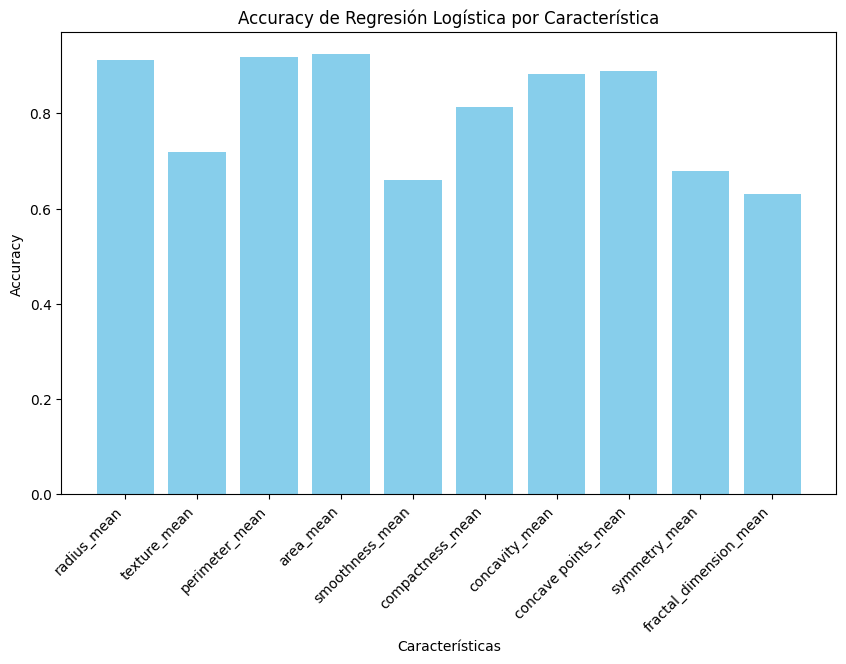

In [ ]:
# Crear un gráfico de barras para visualizar las accuracies por cada característica
plt.figure(figsize=(10, 6))
plt.bar(results['Feature'], results['Accuracy'], color='skyblue')
plt.xlabel('Características')
plt.ylabel('Accuracy')
plt.title('Accuracy de Regresión Logística por Característica')
plt.xticks(rotation=45, ha='right')
plt.show()